# Homework 5 session 8,9

## Task 1. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

In [4]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000]
X2=X[1000:-300,:]; y2=y[1000:-300]
X3=X[-300:,:]; y3=y[-300:]

In [5]:
X1.shape

(1000, 64)

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


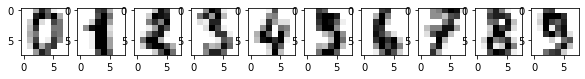

In [6]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

Now apply PCA to see if we can describe the data with a smaller number of most significant features

### Q1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

In [7]:
#Standardising training dataset
scalerdigit = preprocessing.StandardScaler().fit(X1)
X1S=scalerdigit.transform(X1) 

In [8]:
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [9]:
from sklearn.decomposition import PCA

In [10]:
#I am starting with 2

In [11]:
pca_ = PCA(2)
#principalComponents = PCA.fit_transform(X1S)

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X1S)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [13]:
pca.explained_variance_ratio_


array([0.12117158, 0.09725484])

In [14]:
pca = PCA(X1S.shape[1])
dataX1P=pca.fit_transform(X1S)
eigenvalues = pca.explained_variance_ratio_

In [15]:
dataX1P


array([[ 1.46262075e+00, -1.48175981e+00, -4.42538871e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  6.12468546e-15],
       [ 6.57288796e-01,  5.88973608e-01,  4.14114777e+00, ...,
         9.78471381e-16, -4.57706795e-17,  4.16534873e-17],
       [ 1.15309497e+00, -7.69276804e-01,  3.25654892e+00, ...,
         4.53221921e-16,  3.71074724e-17,  2.57196918e-17],
       ...,
       [-3.92629976e-01, -4.56932149e-02, -1.09682283e+00, ...,
         2.70509057e-17,  7.25880203e-18,  3.27561199e-17],
       [ 7.99571633e+00,  8.82533134e-01, -1.23342066e+00, ...,
         1.07418101e-16, -2.66355970e-17,  3.91100384e-17],
       [-2.11169157e+00,  4.41328383e-01, -1.57444727e+00, ...,
        -9.28427661e-17, -4.12869317e-17,  1.91099907e-17]])

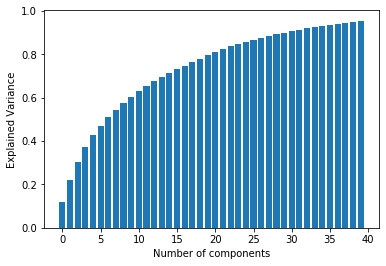

In [16]:
 n=40
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
#plt.axvline(eigenvalues[50], color='k', linestyle='dashed', linewidth=1)
plt.show()

In [17]:
#%50 IS EXPLAINED WITH 7 VARIABLES AND %80 IS EXPLAINED BY 15 VARIABLES

### Q2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

In [18]:
dataXS1=pd.DataFrame(np.concatenate((y1.reshape(len(y1),1),dataX1P),axis=1))
dataXS1.columns=["y"]+["x{}".format(i) for i in range(1,65)]

In [19]:
dataXS1.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,1.462621,-1.481760,-4.425389,1.440417,0.007824,0.649491,-0.607300,1.320935,0.312769,...,-0.003409,0.246271,-0.434251,0.031675,-0.102806,-0.062538,-0.080752,-0.000000e+00,0.000000e+00,6.124685e-15
1,1.0,0.657289,0.588974,4.141148,-0.925951,-1.091260,-0.722809,1.234368,-0.019765,0.840140,...,0.203673,0.391653,0.513634,0.067937,0.145519,-0.097069,0.053741,9.784714e-16,-4.577068e-17,4.165349e-17
2,2.0,1.153095,-0.769277,3.256549,-1.337331,-1.598892,0.865749,-1.736966,-1.711524,2.348701,...,-0.120754,-0.182823,0.037166,-0.270272,-0.554368,0.168907,-0.143377,4.532219e-16,3.710747e-17,2.571969e-17
3,3.0,-3.105652,0.377204,-0.640717,-2.668244,-0.142133,0.766950,0.537913,0.069358,-1.860686,...,-0.174548,0.039301,0.175544,-0.341600,-0.158726,-0.050395,-0.157472,-3.314103e-16,-8.524958e-17,2.346208e-17
4,4.0,3.834991,-2.530604,1.480301,-1.157611,-0.981648,1.256589,1.220412,0.544011,-2.289642,...,-0.416314,-0.309981,-0.132869,0.206081,-0.036316,0.023418,0.168387,4.847421e-16,-6.055846e-17,-1.128860e-17


In [20]:
#from sklearn.decomposition import PCA
#pca=PCA(2)
#X1S=pca.fit_transform(principalDf )
#plt.scatter(X1S[:,0] ,y1S)
#plt.show()


In [21]:
Z=np.array(dataXS1.y)
one=(Z==3)
two=(Z==6)
three=(Z==7)
#create an array of the same length 
D=Z*0
D[one]=3
D[two]=6
D[three]=7

#### colors=('gray','red','green')
fig = plt.figure(figsize=(10,10))
for d in range(,4):
    plt.plot(np.array(XS1.iloc[D==d,0]), yS1.array(Z.iloc[D==d,1]),
        'o', color=colors[d], alpha=0.8, label=d)
plt.legend(['three','six','seven'],loc='upper left')

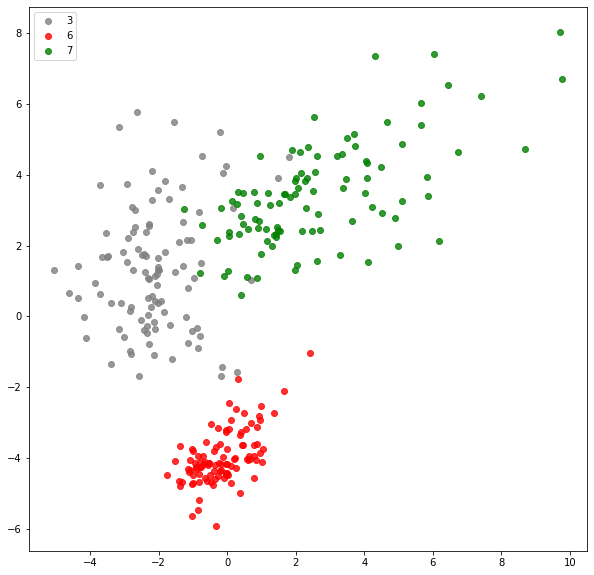

In [22]:
#2-d plot
d_list = [3,6,7]
colors=('gray','red','green','blue')
fig = plt.figure(figsize=(10,10))
for d in range(3):
    plt.plot(np.array(dataXS1.iloc[D==d_list[d],1]), np.array(dataXS1.iloc[D==d_list[d],2]),
        'o', color=colors[d], alpha=0.8, label=d)
plt.legend(['3','6','7'],loc='upper left')


## Task 2. Classify the digits using leading principal components

### Q1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
scalerdigit = preprocessing.StandardScaler().fit(X1)
X3S=scalerdigit.transform(X3) 

In [25]:
X3PCA= pca.transform(X3S)
X3PCAdf=pd.DataFrame(X3PCA)

In [26]:
#X_train=np.c_[x1[:n], x2[:n]]
#X_test=np.c_[x1[n:], x2[n:]]
#Y_train=label[:n]
#logit.fit(X_train,Y_train)

In [27]:
X3PCAdf.iloc[:,:5]

,0,1,2,3,4
0,0.438874,-4.622086,-1.047277,1.138489,0.794306
1,-3.287004,0.910904,-1.326296,-2.740190,-0.362969
2,-7.069348,1.197454,1.052376,3.811829,0.357753
3,2.067536,1.063244,-0.008188,-3.924838,-0.321031
4,1.646409,2.717785,0.124641,0.233999,-0.698044
5,4.008062,-3.253395,1.236737,1.731410,-1.809135
6,-0.361374,-4.535983,-0.161770,0.036993,1.624321
7,-2.863762,1.468337,-1.775587,-2.901899,-1.013889
8,2.403995,0.192208,0.905390,-4.755735,0.326244
9,-3.263547,1.027736,-2.220231,-2.147936,-0.716649


In [28]:
dataXS1

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,1.462621,-1.481760,-4.425389,1.440417,0.007824,0.649491,-0.607300,1.320935,0.312769,...,-0.003409,0.246271,-0.434251,0.031675,-0.102806,-0.062538,-0.080752,-0.000000e+00,0.000000e+00,6.124685e-15
1,1.0,0.657289,0.588974,4.141148,-0.925951,-1.091260,-0.722809,1.234368,-0.019765,0.840140,...,0.203673,0.391653,0.513634,0.067937,0.145519,-0.097069,0.053741,9.784714e-16,-4.577068e-17,4.165349e-17
2,2.0,1.153095,-0.769277,3.256549,-1.337331,-1.598892,0.865749,-1.736966,-1.711524,2.348701,...,-0.120754,-0.182823,0.037166,-0.270272,-0.554368,0.168907,-0.143377,4.532219e-16,3.710747e-17,2.571969e-17
3,3.0,-3.105652,0.377204,-0.640717,-2.668244,-0.142133,0.766950,0.537913,0.069358,-1.860686,...,-0.174548,0.039301,0.175544,-0.341600,-0.158726,-0.050395,-0.157472,-3.314103e-16,-8.524958e-17,2.346208e-17
4,4.0,3.834991,-2.530604,1.480301,-1.157611,-0.981648,1.256589,1.220412,0.544011,-2.289642,...,-0.416314,-0.309981,-0.132869,0.206081,-0.036316,0.023418,0.168387,4.847421e-16,-6.055846e-17,-1.128860e-17
5,5.0,-1.497247,-0.485287,-1.234501,-2.814831,-0.114316,0.941652,1.346231,2.040852,-1.368159,...,-0.106997,0.516623,-0.034727,0.151334,0.207087,0.106464,-0.230315,6.407022e-16,-1.037942e-16,-4.393375e-17
6,6.0,-0.023405,-3.199169,2.625301,0.696361,0.710381,-0.014604,0.401891,-1.787945,-0.446565,...,-0.227350,-0.213608,0.113010,0.238063,-0.232386,-0.035144,0.042824,-5.056765e-16,3.487175e-16,1.412632e-17
7,7.0,2.346501,4.769730,0.639595,0.985716,0.475347,-1.044832,-1.671416,-1.442049,-0.153415,...,0.234705,-0.051275,-0.301315,0.145887,-0.329785,-0.485650,0.187419,-5.394739e-16,2.884987e-16,1.234849e-17
8,8.0,-1.240410,-0.219950,-0.075247,-1.281516,-0.423327,0.817316,-1.184982,-0.970101,-0.213588,...,-0.509287,-0.320408,0.032040,0.476206,-0.142863,-0.075521,0.096695,1.396861e-16,2.100744e-17,-1.595805e-18
9,9.0,-0.730424,-0.455963,-1.502246,-1.074190,-0.072265,-0.541269,0.856980,1.555662,-1.250306,...,-0.073788,0.508648,-0.497735,-0.445393,0.659144,-0.130216,0.064644,4.258518e-16,1.325839e-16,-5.336437e-17


In [29]:
dataX1P[:,1:6].shape

(1000, 5)

In [30]:
#X3PCAdf.iloc[:,:5]

logit = LogisticRegression(C=10000)

X_train=dataX1P[:,:5]
X_test=X3PCAdf.iloc[:,:5]
Y_train= y1
logit.fit(X_train,Y_train)


labelPred=logit.predict(X_test)
labelActual=y3

#train logistic regression based on first two features out os 
logreg = LogisticRegression()
correct=(labelPred==labelActual).sum()/len(labelPred)
print('Accurancy={}'.format(correct))

Accurancy=0.7133333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
logreg1 = LogisticRegression(C=10000)
logreg1.fit(dataX1P[:,0:5], y1)
Z1 = logreg1.predict(dataX1P[:,0:5])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
#accuracy over train
1.0*sum(Z1==y1)/len(Z1)

0.836

### Q2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.

In [33]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy


In [34]:
scalerdigit = preprocessing.StandardScaler().fit(X1)
X2S=scalerdigit.transform(X2) 


In [35]:
#standardising valid dataset
 
X3P=pca.transform(X3S)

In [36]:
scalerdigit = preprocessing.StandardScaler().fit(X1)
X3S=scalerdigit.transform(X) 

In [37]:
#standardising valid dataset
 
X2P=pca.transform(X2S)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
import sklearn.linear_model as sk

In [41]:
X2P_Accurancy={}

#rain_accuracy=[0]*64
#valid_accuracy=[0]*64
#.logreg=[0]*64
for feature in range(1,65) :
    logreg  =LogisticRegression(C=10000).fit(dataX1P[:,:feature],y1)
    y2_pred=logreg.predict(X2P[:,:feature])
    X2P_Accurancy[feature]=(1.0*sum(y2_pred==y2)/len(y2_pred))
                                              
    #logreg[M-1].fit(dataX1P[:,0:M], y1)
    #Z1 = logreg[M-1].predict(dataX1P[:,0:M])
    #Z2 = logreg[M-1].predict(X2P[:,0:M])
    #train_accuracy[M-1] = 1.0*sum(Z1==y1)/len(Z1)
    #valid_accuracy[M-1] = 1.0*sum(Z2==y2)/len(Z2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22

In [42]:
X2P_Accurancy

{1: 0.3038229376257545,
 2: 0.5110663983903421,
 3: 0.6861167002012073,
 4: 0.7686116700201208,
 5: 0.7746478873239436,
 6: 0.7826961770623743,
 7: 0.8269617706237424,
 8: 0.8490945674044266,
 9: 0.8370221327967807,
 10: 0.8390342052313883,
 11: 0.8350100603621731,
 12: 0.8611670020120724,
 13: 0.903420523138833,
 14: 0.9094567404426559,
 15: 0.9114688128772636,
 16: 0.9014084507042254,
 17: 0.8913480885311871,
 18: 0.8913480885311871,
 19: 0.8953722334004024,
 20: 0.89738430583501,
 21: 0.8993963782696177,
 22: 0.8993963782696177,
 23: 0.8993963782696177,
 24: 0.9054325955734407,
 25: 0.9134808853118712,
 26: 0.9014084507042254,
 27: 0.9114688128772636,
 28: 0.903420523138833,
 29: 0.9014084507042254,
 30: 0.9074446680080482,
 31: 0.9014084507042254,
 32: 0.9074446680080482,
 33: 0.903420523138833,
 34: 0.9134808853118712,
 35: 0.9215291750503019,
 36: 0.9175050301810865,
 37: 0.9094567404426559,
 38: 0.9074446680080482,
 39: 0.89738430583501,
 40: 0.89738430583501,
 41: 0.89939637826

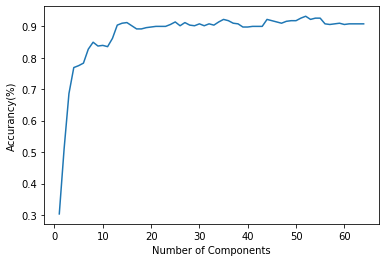

In [43]:
plt.figure()
plt.plot(list(X2P_Accurancy.keys()),list(X2P_Accurancy.values()))
plt.xlabel('Number of Components')
plt.ylabel('Accurancy(%)')
plt.show()


In [44]:
#training logistic regression with 52 principal components

logreg = LogisticRegression()
logreg.fit(dataX1P[:,0:52], y1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
#accuracy over test
Z3A= logreg.predict(X3P[:,0:52])
1.0*sum(Z3A==y3)/len(Z3A)

0.8833333333333333

## Task3. Time Series Analysis
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [46]:
# import dataset
df = pd.read_csv("portland-oregon-average-monthly-.csv")

In [47]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [48]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [49]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


### Q1. Visualize the time-series of monthly ridership

In [50]:
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'pandas_datareader'

In [51]:
df.month= pd.to_datetime(df.month)

print(df['avgMonthlyRide'].dtypes)
print(df['month'].dtypes)

int32
datetime64[ns]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'avgMonthlyRide')

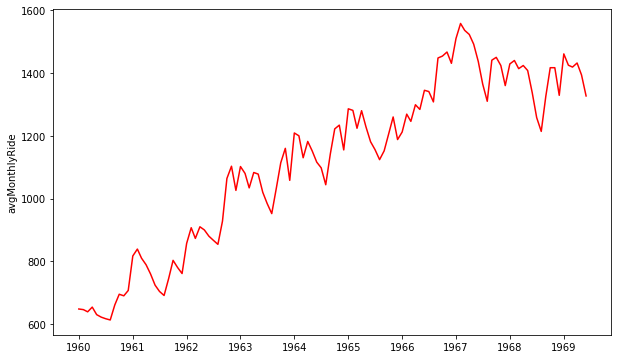

In [52]:
plt.figure(figsize = (10,6))
plt.plot(df.month,df.avgMonthlyRide, label = 'month', color = 'red')
plt.ylabel('avgMonthlyRide')


### Q2. Visualize the 12-month moving average to assess the trend

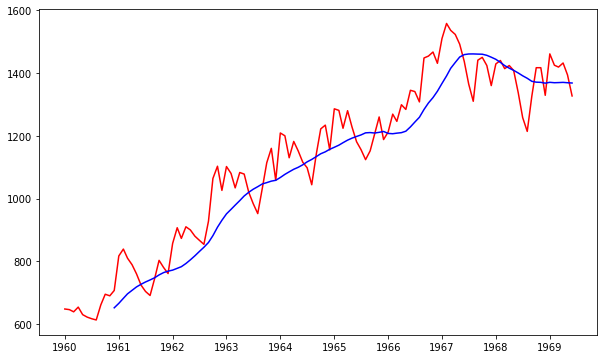

In [53]:
plt.figure(figsize = (10,6))
plt.plot(df.month,df.avgMonthlyRide, label = 'month', color = 'red')
plt.plot(df.month,df.avgMonthlyRide.rolling(window = 12).mean(), label = 'avgMonthlyRide', color = 'blue')

### Q3. Perform seasonal decomposition using 12 month period

In [54]:
import inspect
from sklearn import linear_model
import statsmodels.api as sm
import datetime as dt
import matplotlib
import matplotlib.pyplot as pl
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
import inspect


In [55]:
matplotlib.rcParams['figure.figsize'] = [8, 8]

In [56]:
df.set_index('month', inplace=True)

In [57]:
matplotlib.rcParams['figure.figsize'] = [8, 8]

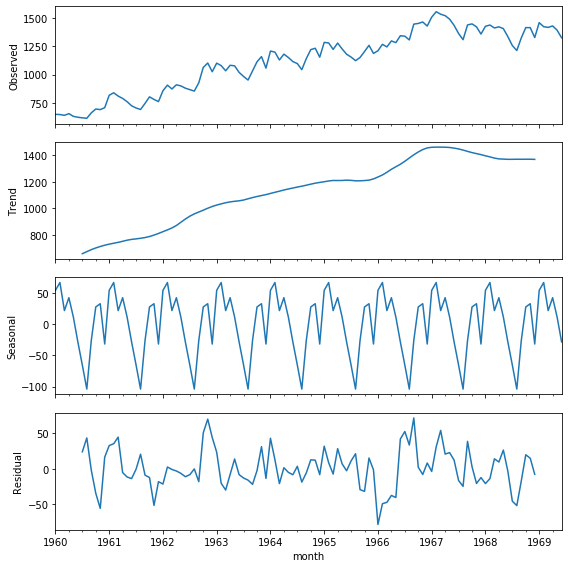

In [58]:
res= sm.tsa.seasonal_decompose(df,model='additive',freq=12) #try mult
res.plot()
plt.show()

### Q4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

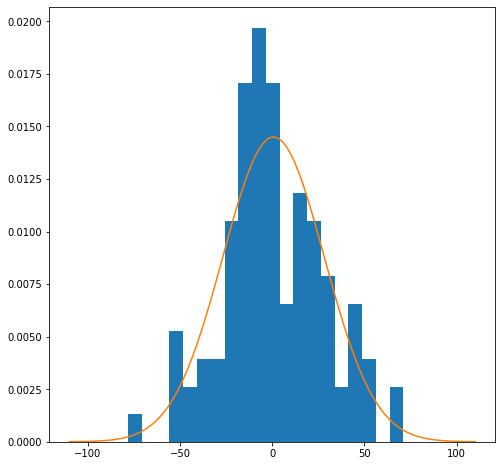

In [59]:
# check the distribution of a sample of data is the histogram
from numpy.random import seed
from numpy.random import randn
# seed the random number generator
seed(1)
# generate univariate observations
# histogram plot
addResult = sm.tsa.seasonal_decompose(df.avgMonthlyRide, model='additive', freq = 12)
residual = np.array(addResult.resid)
residual = residual[np.logical_not(np.isnan(residual))]
# get rid of nan values from the seasonal_decompose
plt.hist(residual,bins=20,density=True)
sigma=residual.std()
x=np.linspace(-4*sigma,4*sigma,100)
plt.plot(x,scipy.stats.norm.pdf(x,loc=residual.mean(),scale=sigma))
plt.show()

### Q5. Find the strongest lower/upper outliers (months with the smallest and largest residues)

In [60]:

min(residual), max(residual)

(-78.15181327160481, 71.1763117283951)